In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tesla_training_complete = pd.read_csv(r'C:\Users\rjfah\OneDrive\Desktop\FN\TESLA.csv')

In [3]:
tesla_training_processed = tesla_training_complete.iloc[:, 1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

tesla_training_scaled = scaler.fit_transform(tesla_training_processed)

In [5]:
features_set = []
labels = []
for i in range(50, 1250):
    features_set.append(tesla_training_scaled[i-50:i, 0])
    labels.append(tesla_training_scaled[i, 0])

In [6]:
features_set, labels = np.array(features_set), np.array(labels)

In [7]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [10]:
model.add(Dense(units = 1))

In [11]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0075
Epoch 2/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0019
Epoch 3/100
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0021
Epoch 4/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0021
Epoch 5/100
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0018
Epoch 6/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0019
Epoch 7/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0019
Epoch 8/100
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0020
Epoch 9/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0014
Epoch 10/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0018A: 0s - l
Epoch 11/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0015
Epoch 12/100
1200/1200 [==============================] - 2s 2ms/

1200/1200 [==============================] - 2s 2ms/step - loss: 6.6857e-04
Epoch 95/100
1200/1200 [==============================] - 2s 2ms/step - loss: 5.6390e-04
Epoch 96/100
1200/1200 [==============================] - 2s 2ms/step - loss: 5.4333e-04
Epoch 97/100
1200/1200 [==============================] - 2s 2ms/step - loss: 6.3071e-04
Epoch 98/100
1200/1200 [==============================] - 2s 2ms/step - loss: 5.7188e-04
Epoch 99/100
1200/1200 [==============================] - 2s 2ms/step - loss: 6.5157e-04
Epoch 100/100
1200/1200 [==============================] - 2s 2ms/step - loss: 6.3964e-04


In [15]:
tesla_testing_complete = pd.read_csv(r'C:\Users\rjfah\OneDrive\Desktop\FN\TESLA.csv')
tesla_testing_processed = tesla_testing_complete.iloc[:, 1:2].values

In [17]:
tesla_total = pd.concat((tesla_training_complete['Open'], tesla_testing_complete['Open']), axis=0)

In [18]:
test_inputs = tesla_total[len(tesla_total) - len(tesla_testing_complete) - 50:].values

In [19]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [20]:
test_features = []
for i in range(50, 70):
    test_features.append(test_inputs[i-50:i, 0])

In [21]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [22]:
predictions = model.predict(test_features)

In [23]:
predictions = scaler.inverse_transform(predictions)

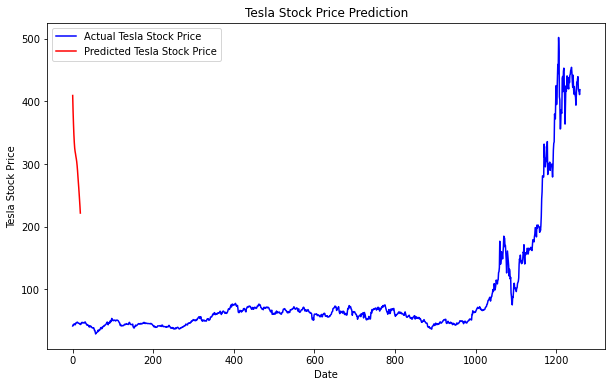

In [25]:
plt.figure(figsize=(10,6))
plt.plot(tesla_testing_processed, color='blue', label='Actual Tesla Stock Price')
plt.plot(predictions , color='red', label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()